In [6]:
import pandas as pd
import numpy as np

In [7]:
## Прочитайте csv файл (використовуйте функцію read_csv)
data = pd.read_csv('bestsellers with categories.csv')
## Виведіть перші п'ять рядків (використовується функція head)
data.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [8]:
## Виведіть розміри датасету (використовуйте атрибут shape)
data.shape

(550, 7)

Про скільки книг зберігає дані датасет? Відповідь: 351



In [9]:
data['Name'].unique().shape

(351,)

In [10]:
data.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']

data.head()

,name,author,user_rating,reviews,price,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


# Первинне дослідження даних

In [11]:
## Перевірте, чи у всіх рядків вистачає даних: виведіть кількість пропусків (na) у кожному зі стовпців (використовуйте функції isna та sum)
for column in data.columns:
    null_cells = data[column].isnull().sum()
    total_cells = len(data[column])
    fillness = f'{round(null_cells / total_cells * 100, 2)}%'
    print(column, fillness)

name 0.0%
author 0.0%
user_rating 0.0%
reviews 0.0%
price 0.0%
year 0.0%
genre 0.0%


Чи є в якихось змінних пропуски? (Так / ні) Відповідь: ні

In [12]:
## Перевірте, які є унікальні значення в колонці genre (використовуйте функцію unique)
data['genre'].unique()

array(['Non Fiction', 'Fiction'], dtype=object)

Які є унікальні жанри? Відповідь: Non Fiction, Fiction


<Axes: ylabel='Frequency'>

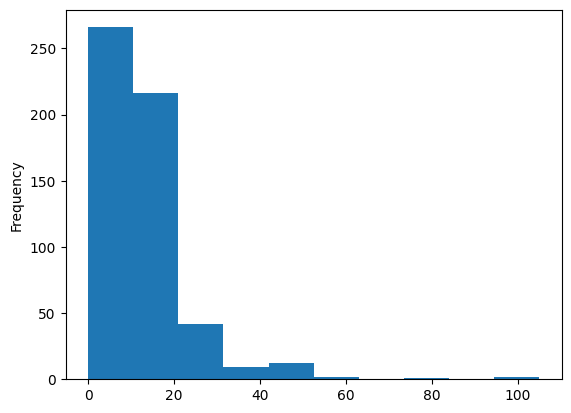

In [13]:
## Тепер подивіться на розподіл цін: побудуйте діаграму (використовуйте kind='hist')
data['price'].plot(kind='hist')

In [14]:
## Визначте, яка ціна у нас максимальна, мінімальна, середня, медіанна (використовуйте функції max, min, mean, median)
price = data['price']

price.max(), price.min(), price.mean(), price.median()

(105, 0, 13.1, 11.0)

Максимальна ціна? Відповідь: 105;
Мінімальна ціна? Відповідь: 0;
Середня ціна? Відповідь: 13.10;
Медіанна ціна? Відповідь: 11


# Пошук та сортування даних

Який рейтинг у датасеті найвищий? Відповідь: 4.9

In [15]:
data['user_rating'].max()

4.9

Скільки книг мають такий рейтинг? Відповідь: 28


In [16]:
len(data.loc[data['user_rating'] == 4.9, 'name'].unique())

28

Яка книга має найбільше відгуків? Відповідь: Where the Crawdads Sing

In [17]:
data.loc[data['reviews'] == data['reviews'].max(), 'name']

534    Where the Crawdads Sing
Name: name, dtype: object

Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)? Відповідь: 20


In [18]:
len(data.loc[(data['year'] == 2010) & (data['genre'] == 'Fiction')])


20

Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)? Відповідь: 1


In [19]:
data.loc[(data['user_rating'] == 4.9) & (data['year'] == 2010 | 2011)]

,name,author,user_rating,reviews,price,year,genre
187,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,4.9,19576,8,2011,Non Fiction


In [20]:
## І насамкінець, давайте відсортуємо за зростанням ціни всі книги, які потрапили до рейтингу в 2015 році і коштують дешевше за 8 доларів (використовуйте функцію sort_values).
sorted_data= data.loc[(data['year'] == 2015) & (data['price'] < 8)].sort_values(by='price', ascending=False).reset_index()

sorted_data

,index,name,author,user_rating,reviews,price,year,genre
0,253,Old School (Diary of a Wimpy Kid #10),Jeff Kinney,4.8,6169,7,2015,Fiction
1,16,Adult Coloring Book: Stress Relieving Animal D...,Blue Star Coloring,4.6,2925,6,2015,Non Fiction
2,376,The Four Agreements: A Practical Guide to Pers...,Don Miguel Ruiz,4.7,23308,6,2015,Non Fiction
3,17,Adult Coloring Book: Stress Relieving Patterns,Blue Star Coloring,4.4,2951,6,2015,Non Fiction
4,224,Love You Forever,Robert Munsch,4.8,18613,5,2015,Fiction
5,28,Baby Touch and Feel: Animals,DK,4.6,5360,5,2015,Non Fiction
6,478,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2015,Fiction
7,55,Creative Haven Owls Coloring Book (Adult Color...,Marjorie Sarnat,4.8,3871,5,2015,Non Fiction
8,63,Dear Zoo: A Lift-the-Flap Book,Rod Campbell,4.8,10922,5,2015,Fiction
9,89,Dover Creative Haven Art Nouveau Animal Design...,Marty Noble,4.6,2134,5,2015,Non Fiction


Яка книга остання у відсортованому списку? Відповідь: To Kill a Mockingbird

In [21]:
sorted_data.iloc[-1]['name']

'To Kill a Mockingbird'

# Агрегування даних та з'єднання таблиць

In [22]:
## Для початку давайте подивимося на максимальну та мінімальну ціни для кожного з жанрів (використовуйте функції groupby та agg, для підрахунку мінімальних та максимальних значень використовуйте max та min). Не беріть усі стовпці, виберіть тільки потрібні вам
data.groupby('genre')['price'].agg(['min', 'max'])

,min,max
genre,,
Fiction,0,82
Non Fiction,0,105


Максимальна ціна для жанру Fiction? Відповідь: 82;
Мінімальна ціна для жанру Fiction? Відповідь: 0;
Максимальна ціна для жанру Non Fiction? Відповідь: 105;
Мінімальна ціна для жанру Non Fiction? Відповідь: 0:

In [23]:
## Тепер створіть новий датафрейм, який вміщатиме кількість книг для кожного з авторів (використовуйте функції groupby та agg, для підрахунку кількості використовуйте count). Не беріть усі стовпці, виберете тільки потрібні
unique_books = data.drop_duplicates(subset=['name'], keep='first')

author_books = unique_books.groupby('author')['name'].agg([('books', 'count')])
author_books

,books
author,
Abraham Verghese,1
Adam Gasiewski,1
Adam Mansbach,1
Adir Levy,1
Admiral William H. McRaven,1
...,...
Walter Isaacson,2
William Davis,1
William P. Young,1


Якої розмірності вийшла таблиця? Відповідь: (175, 1)

In [24]:
author_books.shape

(248, 1)

Який автор має найбільше книг? Відповідь: Jeff Kinney

In [25]:
author_books.loc[author_books['books'] == author_books['books'].max()]

,books
author,
Jeff Kinney,12


Скільки книг цього автора? Відповідь: 12

In [26]:
## Тепер створіть другий датафрейм, який буде вміщати середній рейтинг для кожного автора (використовуйте функції groupby та agg, для підрахунку середнього значення використовуйте mean). Не беріть усі стовпці, виберете тільки потрібні

author_rating = data.groupby('author')['user_rating'].agg([('rating', np.mean)])
author_rating

,rating
author,
Abraham Verghese,4.600000
Adam Gasiewski,4.400000
Adam Mansbach,4.800000
Adir Levy,4.800000
Admiral William H. McRaven,4.700000
...,...
Walter Isaacson,4.566667
William Davis,4.400000
William P. Young,4.600000


У якого автора середній рейтинг мінімальний? Відповідь:: Donna Tartt

In [27]:
author_rating.loc[author_rating['rating'] == author_rating['rating'].min()]

,rating
author,
Donna Tartt,3.9


Який у цього автора середній рейтинг? Відповідь: 3.9

In [28]:
## З'єднайте останні два датафрейми так, щоб для кожного автора було видно кількість книг та середній рейтинг (Використовуйте функцію concat з параметром axis=1). Збережіть результат у змінну
author_data = pd.concat([author_books, author_rating], axis=1)
author_data

,books,rating
author,,
Abraham Verghese,1,4.600000
Adam Gasiewski,1,4.400000
Adam Mansbach,1,4.800000
Adir Levy,1,4.800000
Admiral William H. McRaven,1,4.700000
...,...,...
Walter Isaacson,2,4.566667
William Davis,1,4.400000
William P. Young,1,4.600000


In [29]:
## Відсортуйте датафрейм за зростаючою кількістю книг та зростаючим рейтингом (використовуйте функцію sort_values)
author_data.sort_values(by=['books', 'rating'], ascending=False, inplace=True)

author_data

,books,rating
author,,
Jeff Kinney,12,4.800000
Rick Riordan,10,4.772727
Stephenie Meyer,7,4.657143
Dav Pilkey,6,4.900000
Bill O'Reilly,6,4.642857
...,...,...
Pierre Dukan,1,4.100000
Gallup,1,4.000000
Gillian Flynn,1,4.000000


Який автор перший у списку? Відповідь: Jeff Kinney

# Візуалізація

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

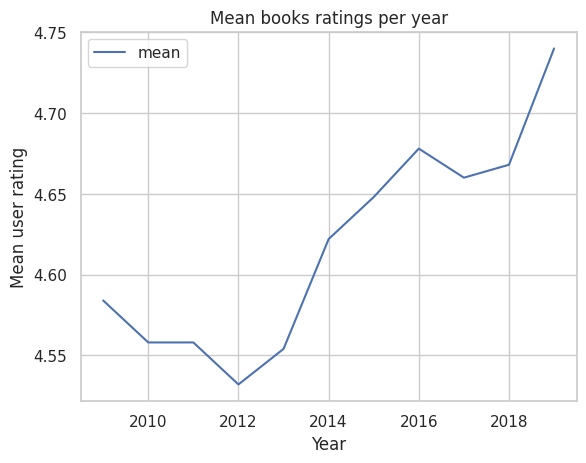

In [92]:
## mean books rating per year
fetch = data.groupby('year')['user_rating'].agg([np.mean])
sns.lineplot(data=fetch)
plt.title('Mean books ratings per year')
plt.xlabel('Year')
plt.ylabel('Mean user rating')

plt.show()

Text(0.5, 1.0, 'Categories per year')

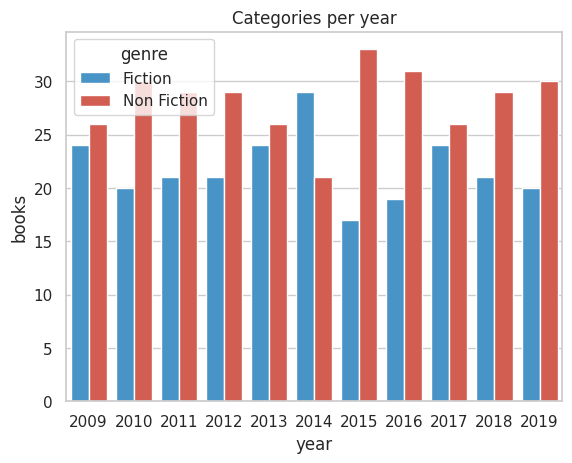

In [86]:
## categories per year
fetch = data.groupby(['year', 'genre'])['name'].agg([('books', 'count')]).reset_index()

colors = ["#3498db", "#e74c3c"]
sns.barplot(x='year', y='books', hue='genre', data=fetch, palette=colors)
plt.title('Category distribution per year')

Text(0.5, 1.0, 'Linear regression reviews / price in 2019 year')

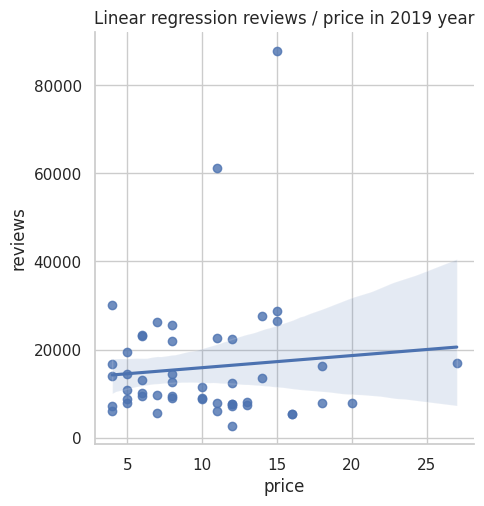

In [98]:
## linear regression reviews / price in 2019 year

fetch = data.loc[data['year'] == 2019]
sns.lmplot(x="price", y="reviews", data=fetch)
plt.title('Linear regression reviews / price in 2019 year')